In [7]:
import torch

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [8]:
from pathlib import Path

dataset_path = Path("dataset/PlantVillage")
class_dirs = [f for f in dataset_path.iterdir() if f.is_dir()]
class_names = sorted([f.name for f in class_dirs])


print(f"✅ Found {len(class_names)} classes:")
for class_name in class_names:
    print(f" - {class_name}")


✅ Found 16 classes:
 - Pepper__bell___Bacterial_spot
 - Pepper__bell___healthy
 - PlantVillage
 - Potato___Early_blight
 - Potato___Late_blight
 - Potato___healthy
 - Tomato_Bacterial_spot
 - Tomato_Early_blight
 - Tomato_Late_blight
 - Tomato_Leaf_Mold
 - Tomato_Septoria_leaf_spot
 - Tomato_Spider_mites_Two_spotted_spider_mite
 - Tomato__Target_Spot
 - Tomato__Tomato_YellowLeaf__Curl_Virus
 - Tomato__Tomato_mosaic_virus
 - Tomato_healthy


In [9]:
from collections import defaultdict

class_counts = defaultdict(int)

for class_dir in class_dirs:
    class_name = class_dir.name
    count = len(list(class_dir.glob("*.jpg")))  # or .png if your dataset uses PNG
    class_counts[class_name] = count

print("\n📊 Image count per class:")
for class_name in sorted(class_counts):
    print(f"{class_name}: {class_counts[class_name]} images")


📊 Image count per class:
Pepper__bell___Bacterial_spot: 997 images
Pepper__bell___healthy: 1477 images
PlantVillage: 0 images
Potato___Early_blight: 1000 images
Potato___Late_blight: 1000 images
Potato___healthy: 152 images
Tomato_Bacterial_spot: 2127 images
Tomato_Early_blight: 1000 images
Tomato_Late_blight: 1908 images
Tomato_Leaf_Mold: 952 images
Tomato_Septoria_leaf_spot: 1771 images
Tomato_Spider_mites_Two_spotted_spider_mite: 1676 images
Tomato__Target_Spot: 1404 images
Tomato__Tomato_YellowLeaf__Curl_Virus: 3208 images
Tomato__Tomato_mosaic_virus: 373 images
Tomato_healthy: 1591 images


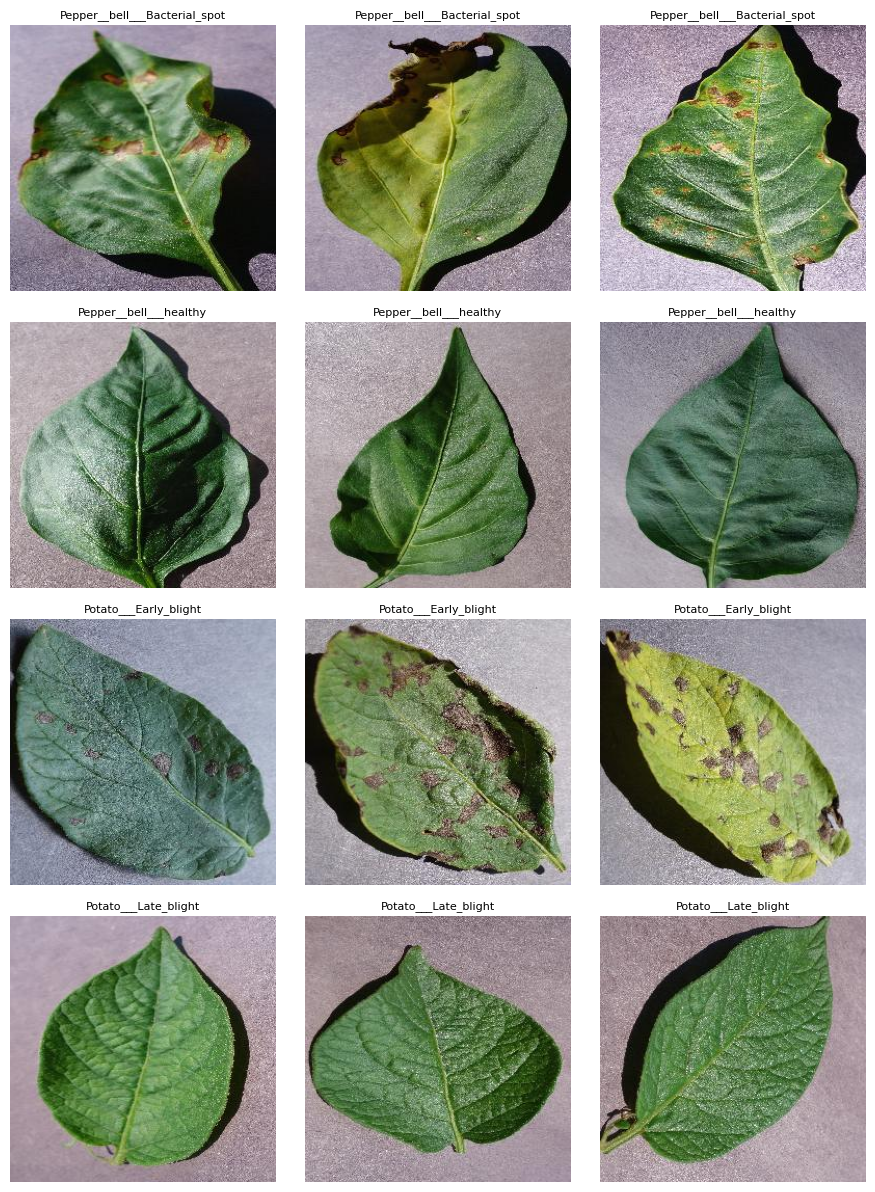

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import random

def show_sample_images(class_dirs, class_names, num_classes=5, images_per_class=3):
    plt.figure(figsize=(images_per_class * 3, num_classes * 3))
    i = 1
    for class_dir, class_name in zip(class_dirs[:num_classes], class_names[:num_classes]):
        # Only select image files (jpg, png)
        image_files = [f for f in class_dir.iterdir() if f.is_file() and f.suffix.lower() in [".jpg", ".jpeg", ".png"]]
        if len(image_files) < images_per_class:
            continue  # skip if not enough images
        images = random.sample(image_files, images_per_class)
        for img_path in images:
            img = Image.open(img_path).convert("RGB")
            plt.subplot(num_classes, images_per_class, i)
            plt.imshow(img)
            plt.title(class_name, fontsize=8)
            plt.axis("off")
            i += 1

    plt.tight_layout()
    plt.show()

show_sample_images(class_dirs, class_names, num_classes=5, images_per_class=3)